# Q Evaluator
Functions for evaluating the Q polynomials at specific points.
Usage:

In [1]:
import itertools

In [3]:
import pandas as pd
polys = pd.read_csv('../data/q_to_denom_500.csv',dtype=str)
polys.rename(columns={'Unnamed: 0':'p/q'},inplace=True)
polys.set_index('p/q', inplace=True)

In [6]:
def eval_q_at_x(fraction, x):
    """
    Retrieves the Q polynomial of the specified fraction. Evaluates the polynomial at the given point x.
    The fraction should be passed as an array.
    """
    # handle fractions larger than 1/2, for which all the denominators are just reversed
    if fraction[0]/fraction[1]>0.5:
        const=-1
        string_fraction = f"[{fraction[1]-fraction[0]},{fraction[1]}]"
    else:
        const = 1
        string_fraction = f"[{fraction[0]},{fraction[1]}]"
    p = polys.loc[string_fraction].to_list()
    p = [int(s)*const for s in p]    
    # cuts off leading zeros
    i = 0
    sum = p[i]
    while sum == 0:
        i += 1
        sum += abs(p[i])
    p = p[i:]
    # evaluates polynomial
    val = 0
    for i, coeff in enumerate(p[::-1]):
        val += x**i * coeff
    return val
    

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def down_the_triangle(alpha, gamma, x):
    alpha = np.array(alpha)
    gamma = np.array(gamma)
    # print recurrence matrix for gamma
    R = np.array(
    [[0,1],
    [(-1)**(gamma[0]+1)* x**gamma[1], eval_q_at_x(gamma, x)]]
    )
    print(R)
    # eigendecompose R
    print(np.linalg.eig(R))
    # print x evaluated at the polynomials alpha +n gamma
    seq = []
    for i in range(20):
        mix = alpha + gamma*i
        seq.append(eval_q_at_x(mix,x))
        print(seq[-1])
    # plot all of these points
    reals = [s.real for s in seq]
    imags = [s.imag for s in seq]
    colors = np.arange(len(seq))
    plt.scatter(reals,imags, c= colors)

[[ 0.    1.  ]
 [-0.25 -1.  ]]
(array([-0.5, -0.5]), array([[ 0.89442719, -0.89442719],
       [-0.4472136 ,  0.4472136 ]]))
1.0
1.0
-1.25
-1.5
-1.8125
-2.1875
-2.640625
-3.1875
-3.84765625
-4.64453125
-5.6064453125
-6.767578125
-8.169189453125
-9.861083984375
-11.90338134765625
-14.36865234375
-17.344497680664062
-20.936660766601562
-25.272785186767578
-30.50695037841797


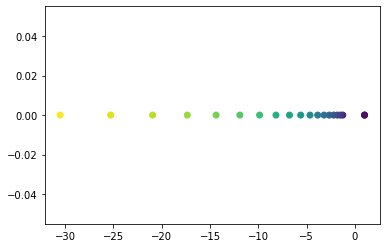

In [13]:
# from 0 to 1, the Fibonacci sequence
down_the_triangle([0,1],[1,1],-0.25)

In [26]:
R = np.array([[0,1],[-0.25,-1]])
V = np.array([[0.89,0.707],[-0.44,0.707]])
AS = V.T @ R @ V
AS

array([[-0.4873    ,  1.01808   ],
       [-0.1573075 , -0.12496225]])

In [24]:
1/2**0.5

0.7071067811865475

In [17]:
V @ AS @ V.T

array([[-0.38599033,  0.19082668],
       [ 0.19082668, -0.09434128]])

[[1.+0.j 0.+0.j]
 [0.+1.j 1.+0.j]]
(1+0j)
(1+0j)
(1+1j)
(1+2j)
3j
(-2+4j)
(-5+4j)
(-9+2j)
(-13-3j)
(-15-12j)
(-12-25j)
-40j
(25-52j)
(65-52j)
(117-27j)
(169+38j)
(196+155j)
(158+324j)
(3+520j)
(-321+678j)


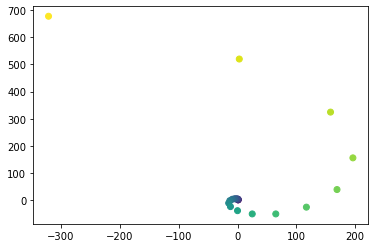

In [43]:
down_the_triangle([0,1],[1,1],0+1j)

[[ 1.+0.j  0.+0.j]
 [-0.-1.j  1.+0.j]]
(1+0j)
(1-1j)
(1-2j)
-3j
(-2-4j)
(-5-4j)
(-9-2j)
(-13+3j)
(-15+12j)
(-12+25j)
40j
(25+52j)
(65+52j)
(117+27j)
(169-38j)
(196-155j)
(158-324j)
(3-520j)
(-321-678j)
(-841-681j)


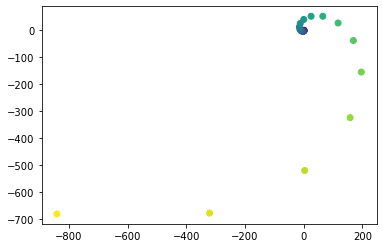

In [44]:
down_the_triangle([1,2],[0,1],0+1j)

[[ 1.+0.j  0.+0.j]
 [-1.+0.j  1.+0.j]]
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j


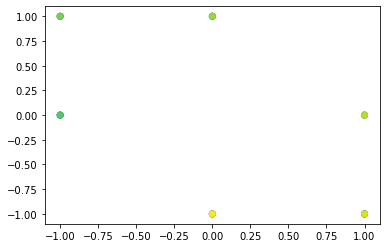

In [45]:
down_the_triangle([1,3],[1,2],0+1j)

[[ 1.+0.j  0.+0.j]
 [-1.+0.j  1.+0.j]]
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j


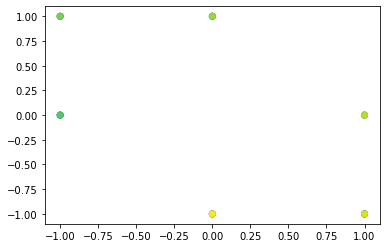

In [45]:
down_the_triangle([1,3],[1,2],0+1j)

In [46]:
import math
math.gcd(12,60)

12

In [44]:
polys.index

Index(['[0,1]', '[1,1]', '[1,0]', '[1,2]', '[1,3]', '[1,4]', '[1,5]', '[1,6]',
       '[1,7]', '[1,8]',
       ...
       '[309,688]', '[327,728]', '[358,797]', '[339,752]', '[321,712]',
       '[344,763]', '[346,767]', '[374,829]', '[379,828]', '[391,852]'],
      dtype='object', name='p/q', length=75919)

(-100.0, 100.0)

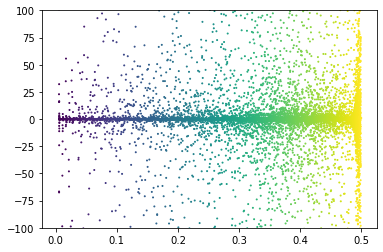

In [109]:
# plot of the antiroot function
# get all fractions with denom up to max denom in unit interval to 1/2
import math
x = 0.25 + 0.25j
# get all of the fracs available, and sort them
def string_to_list(x):
    return list(map(int,x[1:-1].split(',')))
fracs = [string_to_list(i) for i in polys.index[3:]] # to avoid division by zero
fracs = sorted(fracs,key=lambda s:  s[0]/s[1])
# print(fracs)

ys = []
frac_points = [s[0]/s[1] for s in fracs]
for f in fracs:
    ys.append(eval_q_at_x(f,x))
# plot all of these points
reals = [s.real for s in ys]
imags = [s.imag for s in ys]
colors = np.arange(len(ys))
plt.scatter(frac_points,reals, c=colors, s=1)
# plt.xlim(-1,2)
plt.ylim(-100,100)

(-20000000.0, 20000000.0)

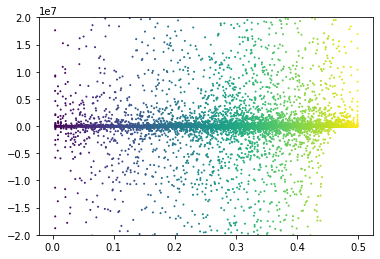

In [110]:
plt.scatter(frac_points, reals, c= colors, s=1)
# plt.xlim(-1,2)
plt.ylim(-20000000,20000000)

(-2.0, 2.0)

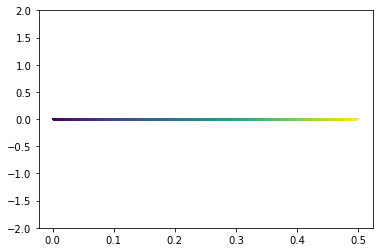

In [102]:
plt.scatter(frac_points, imags, c= colors, s=1)
# plt.xlim(-1,2)
plt.ylim(-2,2)

(-1.0, 1.0)

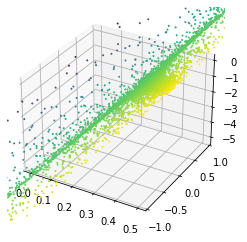

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(frac_points,reals,imags,c=colors, s = 1)
plt.ylim(-1,1)

/Users/adjourner/opt/anaconda3/envs/rutabaga/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


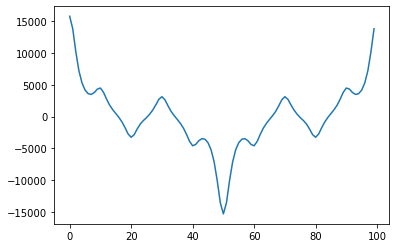

In [87]:
plt.plot(np.fft.fft(reals))

In [68]:
ys

[(1+0j),
 (0.001868909341328247-0.0030284838867021442j),
 (0.00797093107579272+0.002097875683091388j),
 (-0.0010534890529422876-0.0010244735773182224j),
 (-0.06271117925643921-0.05475044250488281j),
 (0.0911865234375+0.09578704833984375j),
 (-0.0050578830456196044+0.0029108248008355986j),
 (5.480170810973141e-05+5.798541926322957e-05j),
 (0.023100435733795166-0.06761550903320312j),
 (2.103568914242865e-06-1.2142143002961352e-06j),
 (0.17578125+0.28125j),
 (1.5749033518833994e-05-1.2009276820073782e-05j),
 (0.06531006097793579-0.013017654418945312j),
 (7.5332619318861096e-06+2.7857008480550105e-06j),
 (0.0009287568902074383+0.0007721307238739428j),
 (-0.067657470703125-0.01354217529296875j),
 (-0.007359921932220459+0.046749114990234375j),
 (-8.426689130986215e-06+1.2851776059669358e-05j),
 (-0.0042045207939587215-0.005119983406984829j),
 (-3.5220776265303724e-05+0.00011319738983326809j),
 (-0.3125-0.5j),
 (-3.6605319282019133e-06+7.956979354103233e-05j),
 (-0.0034002488616202697-0.00250